# Heart Disease Prediction Using Machine Learning

## Introduction

Heart disease is a major health issue worldwide, and it is difficult to discover the disease before symptoms emerge. Our goal of this project is to utilize machine learning techniques and predict whether or not a person has heart disease. This will be done through our dataset, which is derived from the Cleveland Heart Disease Database and consists of 14 important attributes selected from a total of 76. It encompasses a range of variables including physical and psychological details, such as age, sex, cholesterol, etc. It also categorizes individuals based on the absence (value 0) or presence (values 1-4) of heart disease, providing a clear framework for analyzing the predictive power of medical test results. 

## Methods

### We are going to do the following: 

1. Mutate the data to make sure categorical variables are treated as factors
2. Change the variable names to more descriptive and human-readable
3. Use k-nearest neighbors regression algorithm to predict the likeliness of a person having a heart disease using the blood pressure, cholesterol, blood sugar and heart rate attributes.
4. We will scale the data in order to standardize the data.
5. We will use a bar plot to visualize how an attribute affects the likelihood to have a heart disease.


## EXPECTED OUTCOMES AND SIGNIFICANCE

### What do you expect to find?
After this project, we expect to find that cholesterol, heart rate, fasting blood sugar and blood pressure have a positive relation to the probability of having heart diseases.

### What impact could such findings have?
With these findings, we can track down symptoms of heart disease earlier than usual, allowing doctors to begin treatment in the early stages, or warn the patient of potential heart disease.


### What future questions could this lead to?
Future studies could implement similar algorithms to find other health diseases.

In [ ]:
library(tidyverse)
library(tidymodels)
library(cowplot)

In [ ]:
# clean and wrangle data
cleveland_data <- read_csv("data/processed_cleveland.csv")|>
                mutate(sex = as_factor(sex),
                       cp = as_factor(cp),
                       fbs = as_factor(fbs),
                       restecg = as_factor(restecg),
                       exang = as_factor(exang),
                       slope = as_factor(slope),
                       thal = as_factor(thal),
                       num = as_factor(num),
                       ca = as.integer(ca))|>
                rename(chest_pain = cp,
                       blood_pressure = trestbps,
                       cholesterol = chol,
                       blood_sugar = fbs,
                       rest_ecg = restecg,
                       heart_rate = thalach,
                       angina = exang,
                       st_depression = oldpeak,
                       num_vessels = ca,
                       diagnosis = num)

cleveland_data

In [ ]:
# splitting data into training and testing
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

In [ ]:
# summarizing the number of observations of each diagnosis in the training data
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))
heart_disease_proportions

# summarizing the mean of blood pressure, cholesterol, and heart rate for each diagnosis
average_values <- cleveland_train |>
                group_by(diagnosis) |>
                summarize(mean_blood_pressure = mean(blood_pressure),
                          mean_cholesterol = mean(cholesterol),
                          mean_heart_rate = mean(heart_rate))
average_values

In [ ]:
rbp_chol_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = cholesterol, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Serum cholesterol level in mg/dl", 
                     color = "Diagnosis of heart disease") +
                theme(text = element_text(size = 13))
rbp_chol_plot

In [ ]:
rbp_hr_plot <- ggplot(cleveland_train, aes(x = blood_pressure, y = heart_rate, color = diagnosis)) +
                geom_point(alpha = 0.6) +
                labs(x = "Resting blood pressure in mm Hg", 
                     y = "Maximum heart rate", 
                     color = "Diagnosis of heart disease") +
                theme(text = element_text(size = 13))
rbp_hr_plot

In [ ]:
fbs_ratio_plot <- ggplot(cleveland_train, aes(x = blood_sugar, fill = diagnosis)) +
                geom_bar(position = "fill") +
                labs(x = "Fasting blood sugar > 120 mg/dl",
                     y = "Ratio",
                     fill = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
fbs_ratio_plot

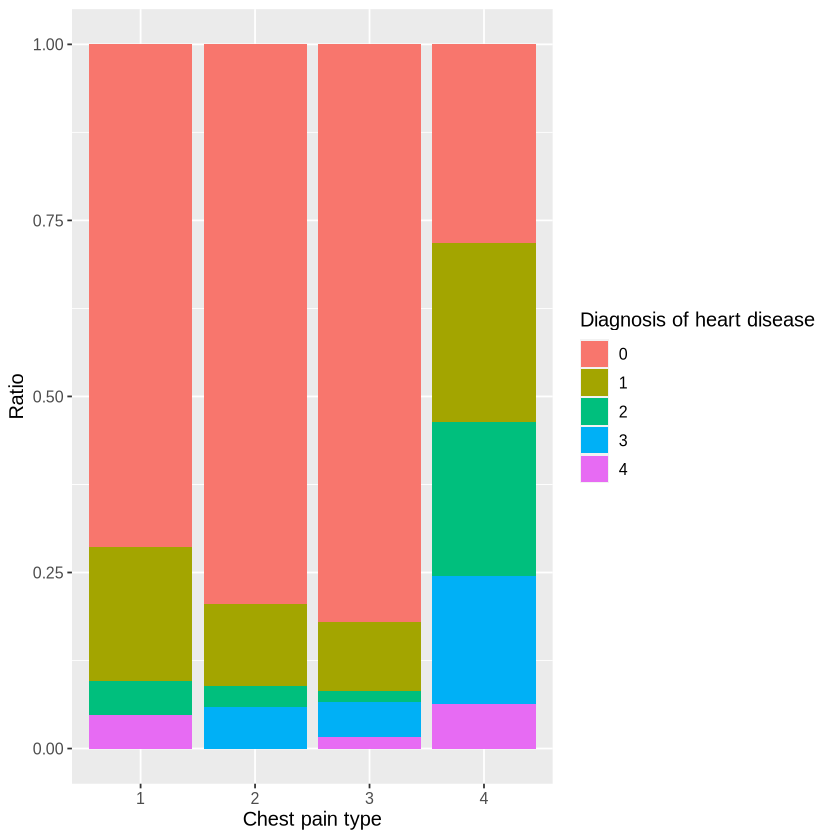

In [ ]:
cp_ratio_plot <- ggplot(cleveland_train, aes(x = chest_pain, fill = diagnosis)) +
                geom_bar(position = "fill") +
                labs(x = "Chest pain type",
                     y = "Ratio",
                     fill = "Diagnosis of heart disease") +
                theme(text = element_text(size = 12))
cp_ratio_plot

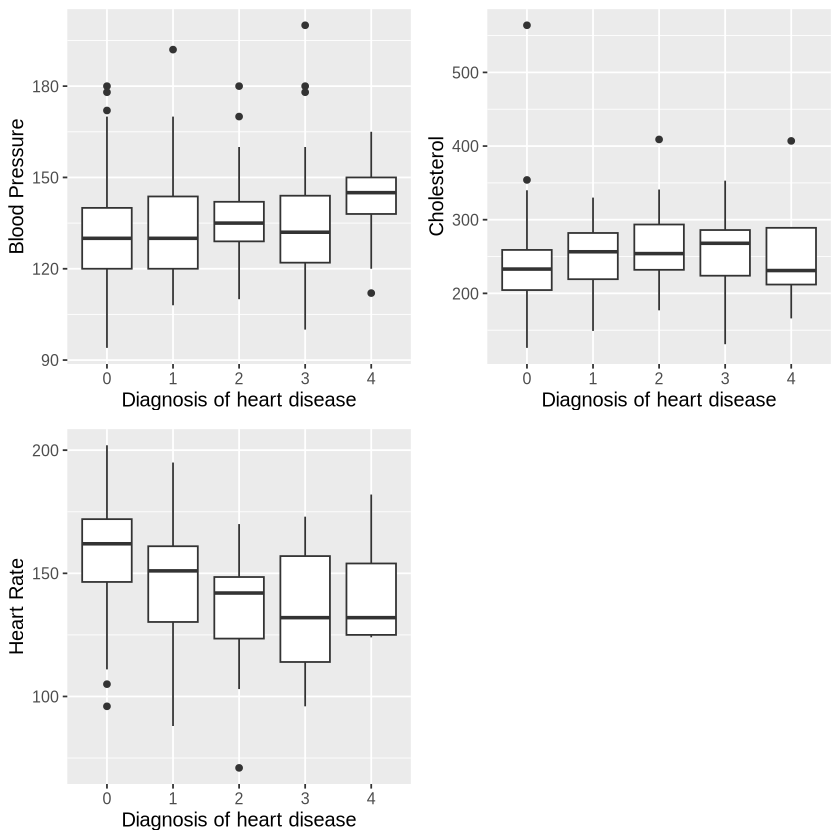

In [ ]:
bp_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = blood_pressure)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Blood Pressure") + 
            theme(text = element_text(size = 12))

chol_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = cholesterol)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Cholesterol") + 
            theme(text = element_text(size = 12))

hr_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = heart_rate)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Heart Rate") + 
            theme(text = element_text(size = 12))

plot_grid(bp_box_plot, chol_box_plot, hr_box_plot, ncol = 2)